<a href="https://colab.research.google.com/github/SouravRay17/Sales_Forecasting/blob/main/sales_froecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime
import os
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import squarify

In [4]:
#import required library
import os
import pandas as pd
import matplotlib.pyplot as plt


#find file path directory
for dirname, _, filenames in os.walk('/content/sales_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


#data path
dir_path = '/content/sales_data'

#create empty df for all sales
all_sales_df = pd.DataFrame()

#concat all csv in dir path
for filename in os.listdir(dir_path):
    df = pd.read_csv(os.path.join(dir_path, filename))
    all_sales_df = pd.concat ([all_sales_df, df], ignore_index=True)

#rename column name
all_sales_df = all_sales_df.rename(mapper = str.strip, axis='columns')
all_sales_df = all_sales_df.rename(columns={'Order ID': 'Order_id', 
                                            'Quantity Ordered': 'Quantity', 
                                            'Price Each': 'Price', 
                                            'Order Date': 'Date', 
                                            'Purchase Address': 'Address'})

#lowercase column name
column_name = list(all_sales_df.columns)
column_name = [x.lower().strip() for x in column_name] 
all_sales_df.columns = column_name

#show dataframe info
print(all_sales_df.info())

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/sales_data/Sales_January_2019.csv
/content/sales_data/Sales_May_2019.csv
/content/sales_data/Sales_February_2019.csv
/content/sales_data/Sales_November_2019.csv
/content/sales_data/Sales_August_2019.csv
/content/sales_data/Sales_October_2019.csv
/content/sales_data/Sales_September_2019.csv
/content/sales_data/Sales_December_2019.csv
/content/sales_data/Sales_April_2019.csv
/content/sales_data/Sales_March_2019.csv
/content/sales_data/Sales_July_2019.csv
/content/sales_data/Sales_June_2019.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  186305 non-null  object
 1   product   186305 non-null  object
 2   quantity  186305 non-null  object
 3   price     186305 non-null  object
 4   date      186305 non-null  object
 5   address   186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


In [5]:
all_sales_df.head()

,order_id,product,quantity,price,date,address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
all_sales_df.shape

(186850, 6)

In [7]:
all_sales_df.nunique()

order_id    178438
product         20
quantity        10
price           24
date        142396
address     140788
dtype: int64

#Understanding Variable

In [8]:
all_sales_df.dtypes

order_id    object
product     object
quantity    object
price       object
date        object
address     object
dtype: object

In [9]:
all_sales_df['order_id'].unique()

array(['141234', '141235', '141236', ..., '222907', '222908', '222909'],
      dtype=object)

In [10]:
all_sales_df['product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [11]:
all_sales_df['address'].unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '590 Wilson St, Los Angeles, CA 90001',
       '685 Hickory St, New York City, NY 10001',
       '209 11th St, Atlanta, GA 30301'], dtype=object)

#Searching missing values and duplicate rows

In [12]:
#This will check the missing values percentage in columns 
features_with_na=[features for features in all_sales_df.columns if all_sales_df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(all_sales_df[feature].isnull().mean()*100, 4),  ' % missing values')

order_id 0.2917  % missing values
product 0.2917  % missing values
quantity 0.2917  % missing values
price 0.2917  % missing values
date 0.2917  % missing values
address 0.2917  % missing values


In [13]:
null_data = all_sales_df[all_sales_df.isnull().any(axis=1)]

In [14]:
null_data.shape

(545, 6)

In [15]:
display(null_data)

,order_id,product,quantity,price,date,address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
duplicate = all_sales_df[all_sales_df.duplicated(keep = False)]
duplicate

,order_id,product,quantity,price,date,address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
874,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
...,...,...,...,...,...,...
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN
186532,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#Data cleaning

In [17]:
#rename column name
all_sales_df = all_sales_df.rename(mapper = str.strip, axis='columns')
all_sales_df = all_sales_df.rename(columns={'Order ID': 'order_id', 
                                            'Quantity Ordered': 'quantity', 
                                            'Price Each': 'price', 
                                            'Order Date': 'date', 
                                            'Purchase Address': 'address'})

#lowercase column name
column_name = list(all_sales_df.columns)
column_name = [x.lower().strip() for x in column_name] 
all_sales_df.columns = column_name

#show dataframe info
print(all_sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  186305 non-null  object
 1   product   186305 non-null  object
 2   quantity  186305 non-null  object
 3   price     186305 non-null  object
 4   date      186305 non-null  object
 5   address   186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


In [18]:
#drop null rows
all_sales_df = all_sales_df.dropna()

#drop duplicated rows
clean_sales = all_sales_df[~ all_sales_df.duplicated()]
#drop non-numeric values in order_id, quantity, and price
clean_sales = clean_sales[pd.to_numeric(clean_sales['order_id'], errors='coerce').notnull()]
clean_sales = clean_sales[pd.to_numeric(clean_sales['quantity'], errors='coerce').notnull()]
clean_sales = clean_sales[pd.to_numeric(clean_sales['price'], errors='coerce').notnull()]

#print data cleaning result
print("Null values in:")
print(all_sales_df.isnull().sum())
print("Duplicated rows: ", clean_sales.duplicated().sum())

Null values in:
order_id    0
product     0
quantity    0
price       0
date        0
address     0
dtype: int64
Duplicated rows:  0


data manupulation

In [19]:
#change data type for column quantity, price, date, and address
clean_sales['quantity'] = clean_sales['quantity'].astype(int)
clean_sales['price'] = clean_sales['price'].astype(float)
clean_sales['date'] = pd.to_datetime(clean_sales['date'], format='%m/%d/%y %H:%M')
clean_sales['address'] = clean_sales['address'].astype(str)

#add month, state, and total_sales column
clean_sales['month'] = pd.DatetimeIndex(clean_sales['date']).month
clean_sales['state'] = clean_sales['address'].str[-8:-6]
clean_sales['total_sales'] = clean_sales['quantity'] * clean_sales['price']

#find and remove partial data
#print(clean_sales(clean_sales['date].dt.year != 2019).count()) / result = 8k
clean_sales_2019 = clean_sales[clean_sales['date'].dt.year == 2019]

#print the data manipulation result
print("Data result:")
print(clean_sales_2019.info())
print("Data is not 2019:")
print(clean_sales_2019[clean_sales_2019['date'].dt.year != 2019].count())

Data result:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185652 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     185652 non-null  object        
 1   product      185652 non-null  object        
 2   quantity     185652 non-null  int64         
 3   price        185652 non-null  float64       
 4   date         185652 non-null  datetime64[ns]
 5   address      185652 non-null  object        
 6   month        185652 non-null  int64         
 7   state        185652 non-null  object        
 8   total_sales  185652 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB
None
Data is not 2019:
order_id       0
product        0
quantity       0
price          0
date           0
address        0
month          0
state          0
total_sales    0
dtype: int64


#EDA
What is the total number of sales in 2019

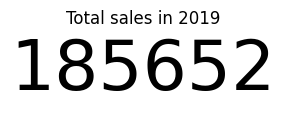

In [20]:
#find length of sales in 2019
total_sales_2019 = len(clean_sales_2019)

#generate total sales visual
fig, total_sales_visual = plt.subplots(figsize=(3, 1))
total_sales_visual.axis('off')
total_sales_visual.text(0.5, 0.5, str(total_sales_2019), fontsize=50, ha='center', va='center')
total_sales_visual.set_title('Total sales in 2019')
plt.show()

WHAT IS THE ANNUAL & MONTHLY REVENUE IN 2019?

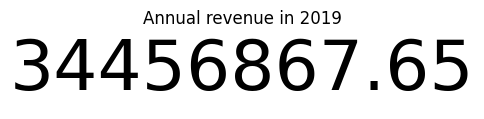

In [21]:
#find annual summary
annual_revenue_2019 = clean_sales_2019['total_sales'].sum()

#generate annual revenue visual
fig, annual_visual = plt.subplots(figsize=(3, 1))
annual_visual.axis('off')
annual_visual.text(0.5, 0.5, "{:.2f}".format(round(annual_revenue_2019, 2)), fontsize=50, ha='center', va='center')
annual_visual.set_title('Annual revenue in 2019')
plt.show()

MONTHLY REVENUE 2019

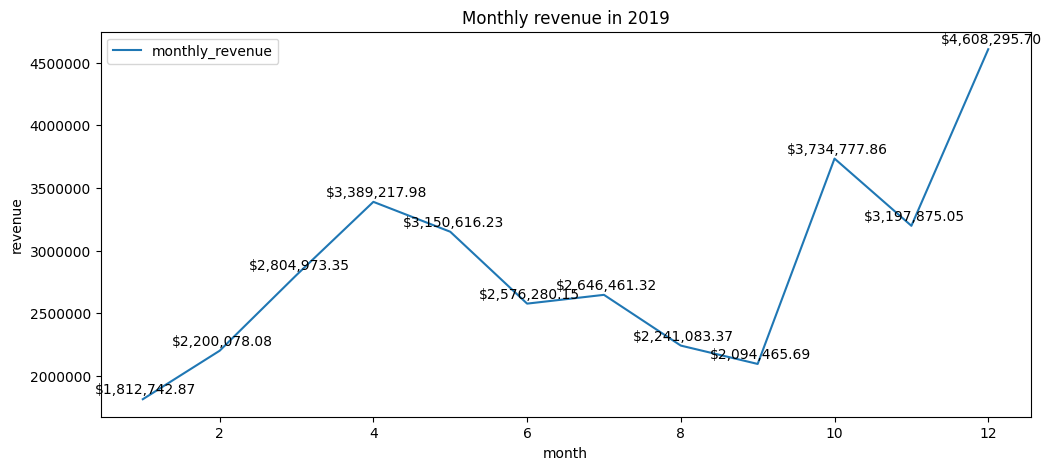

In [22]:
#find monthly summary
monthly_revenue_2019 = clean_sales_2019.groupby(clean_sales_2019['date'].dt.month)['total_sales'].sum()
monthly_revenue_2019 = monthly_revenue_2019.to_frame(name='monthly_revenue')
monthly_revenue_2019.index.name = 'month'
monthly_revenue_2019.reset_index(inplace=True)

#generate monthly revenue visual
monthly_visual = monthly_revenue_2019.plot(kind='line', x='month', y='monthly_revenue', figsize=(12, 5))
monthly_visual.ticklabel_format(style='plain', axis='y')
monthly_visual.set_title('Monthly revenue in 2019')
monthly_visual.set_ylabel('revenue')

#add data callouts
for x, y in zip(monthly_revenue_2019['month'], monthly_revenue_2019['monthly_revenue']):
    label = "${:,.2f}".format(y)
    monthly_visual.annotate(label, (x,y), textcoords="offset points", xytext=(2,4), ha='center')
plt.show()

WHICH STATE GENERATED THE MOST HIGHEST & LOWEST SALES ON AVERAGE?

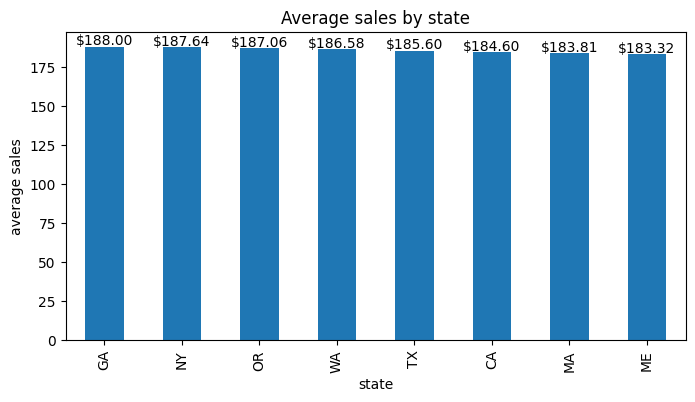

In [23]:
#create dataframe for sales by state
sales_by_state = clean_sales_2019.groupby('state')['total_sales'].mean()
sales_by_state = sales_by_state.to_frame(name='state_revenue')
sales_by_state.index.name = 'state'
sales_by_state = sales_by_state.sort_values(by='state_revenue', ascending=False)
sales_by_state.reset_index(inplace=True)

#generate sales by state visual
state_visual = sales_by_state.plot(kind='bar', x='state', y='state_revenue', figsize=(8, 4), legend=False)
state_visual.ticklabel_format(style='plain', axis='y')
state_visual.set_title("Average sales by state")
state_visual.set_ylabel('average sales')

#add data callouts to each point
for p in state_visual.patches:
    label = "${:,.2f}".format(p.get_height())
    state_visual.annotate(label, (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')
plt.show()

MAX & MIN SALES IN SALES BY STATE

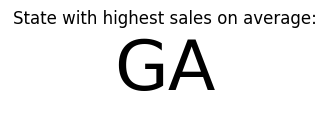

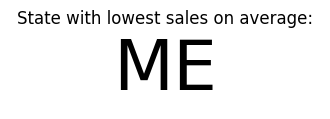

In [24]:
#find state with max & min in state revenue
state_highest_sales = sales_by_state['state'][sales_by_state['state_revenue'].idxmax()]
state_lowest_sales = sales_by_state['state'][sales_by_state['state_revenue'].idxmin()]

#generate visual for most sales
fig, highest_state_visual = plt.subplots(figsize=(4, 1))
highest_state_visual.axis('off')
highest_state_visual.text(0.5, 0.5, str(state_highest_sales), fontsize=50, ha='center', va='center')
highest_state_visual.set_title('State with highest sales on average:')
plt.show()

#generate visual for lowest sales
fig, lowest_state_visual = plt.subplots(figsize=(4, 1))
lowest_state_visual.axis('off')
lowest_state_visual.text(0.5, 0.5, str(state_lowest_sales), fontsize=50, ha='center', va='center')
lowest_state_visual.set_title('State with lowest sales on average:')
plt.show()

WHEN WERE THE BEST & WORST SELLING PERIODS?
MONTHLY REVENUE COMPARISON

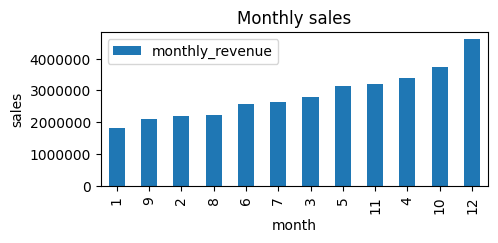

In [25]:
#sort the dataframe for monthly revenue
monthly_revenue_2019_sorted = monthly_revenue_2019.sort_values(by='monthly_revenue')

#generate bar visual for monthly revenue
monthly_sorted_visual = monthly_revenue_2019_sorted.plot(kind='bar', x='month', y='monthly_revenue', figsize=(5, 2))
monthly_sorted_visual.ticklabel_format(style='plain', axis='y')
monthly_sorted_visual.set_title("Monthly sales")
monthly_sorted_visual.set_ylabel('sales')
plt.show() 

MIN & MAX MONTHLY REVENUE

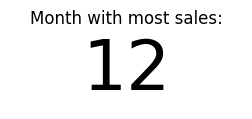

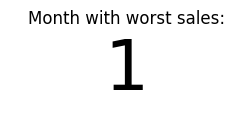

In [26]:
#find max and min value for month in monthly revenue
best_month = monthly_revenue_2019['month'][monthly_revenue_2019['monthly_revenue'].idxmax()]
worst_month = monthly_revenue_2019['month'][monthly_revenue_2019['monthly_revenue'].idxmin()]

#generate best selling month as visual
fig, best_month_visual = plt.subplots(figsize=(3, 1))
best_month_visual.axis('off')
best_month_visual.text(0.5, 0.5, str(best_month), fontsize=50, ha='center', va='center')
best_month_visual.set_title('Month with most sales:')
plt.show()

#generate worst selling month as visual
fig, worst_month_visual = plt.subplots(figsize=(3, 1))
worst_month_visual.axis('off')
worst_month_visual.text(0.5, 0.5, str(worst_month), fontsize=50, ha='center', va='center')
worst_month_visual.set_title('Month with worst sales:')
plt.show()

WHICH PRODUCTS SELL BEST & WORST?

PRODUCT SALES LIST

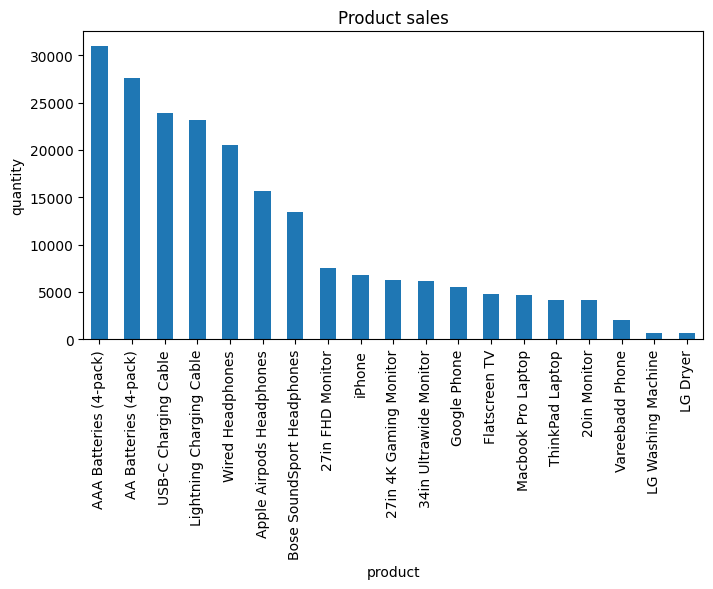

In [27]:
#create dataframe for product_sales
product_sales = clean_sales_2019.groupby('product')['quantity'].sum()
product_sales = product_sales.to_frame(name='product_sales')
product_sales.index.name = 'product'
product_sales = product_sales.sort_values(by='product_sales', ascending=False)
product_sales.reset_index(inplace=True)

#generate bar visual for product sales
product_sales_visual = product_sales.plot(kind='bar', x='product', y='product_sales', figsize=(8, 4), legend=False)
product_sales_visual.ticklabel_format(style='plain', axis='y')
product_sales_visual.set_title("Product sales")
product_sales_visual.set_ylabel('quantity')
plt.show()

MAX & MIN SALES FOR PRODUCT

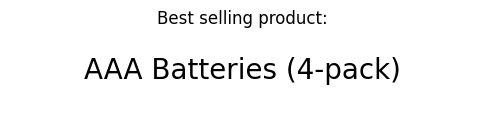

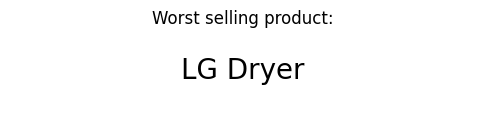

In [28]:
#find best selling and worst selling for product in product sales
best_selling_product = product_sales['product'][product_sales['product_sales'].idxmax()]
worst_selling_product = product_sales['product'][product_sales['product_sales'].idxmin()]

#generate visual for best selling product
fig, best_selling_visual = plt.subplots(figsize=(6, 1))
best_selling_visual.axis('off')
best_selling_visual.text(0.5, 0.5, str(best_selling_product), fontsize=20, ha='center', va='center')
best_selling_visual.set_title('Best selling product:')
plt.show()

#generate visual for worst selling product
fig, worst_selling_visual = plt.subplots(figsize=(6, 1))
worst_selling_visual.axis('off')
worst_selling_visual.text(0.5, 0.5, str(worst_selling_product), fontsize=20, ha='center', va='center')
worst_selling_visual.set_title('Worst selling product:')
plt.show()

WHAT PRODUCTS IS THE MOST CHEAP & EXPENSIVE?

PRICE LIST COMPARISION

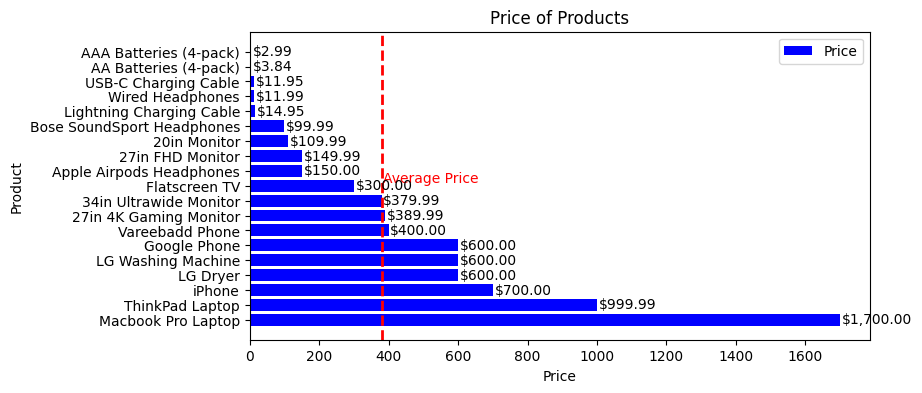

In [29]:
#find price for each item list
products_list = clean_sales_2019.groupby('product')['price'].first().reset_index()
products_list = products_list.sort_values(by='price', ascending=False)

#find product price average
avereage_product_price = products_list['price'].mean()

#generate a horizontal bar chart
fig, pricing_visual = plt.subplots(figsize=(8, 4))
pricing_visual.barh(y=products_list['product'], width=products_list['price'], color='blue')
pricing_visual.legend(['Price'])
pricing_visual.set_title('Price of Products')
pricing_visual.set_xlabel('Price')
pricing_visual.set_ylabel('Product')
pricing_visual.axvline(x=avereage_product_price, color='red', linestyle='--', linewidth=2)
pricing_visual.text(avereage_product_price+5, len(products_list)/2, 'Average Price', color='red', ha='left', va='center')

#add labels to the bars
for i, v in enumerate(products_list['price']):
    pricing_visual.text(v+5, i, "${:,.2f}".format(v), color='black', ha='left', va='center')
plt.show()

MAX & MIN PRICE IN PRODUCT

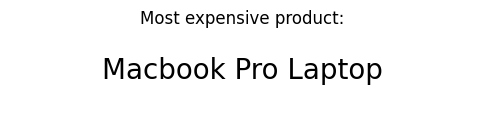

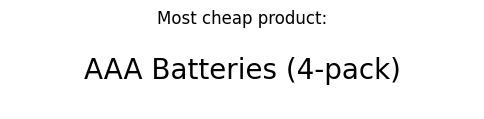

In [30]:
#find cheapest and most expensive and cheap products
most_expensive_product = products_list['product'][products_list['price'].idxmax()]
most_cheap_product = products_list['product'][products_list['price'].idxmin()]

#generate visual for most cheap product
fig, expensive_product_visual = plt.subplots(figsize=(6, 1))
expensive_product_visual.axis('off')
expensive_product_visual.text(0.5, 0.5, str(most_expensive_product), fontsize=20, ha='center', va='center')
expensive_product_visual.set_title('Most expensive product:')
plt.show()

#generate visual for most expensive product
fig, cheap_product_visual = plt.subplots(figsize=(6, 1))
cheap_product_visual.axis('off')
cheap_product_visual.text(0.5, 0.5, str(most_cheap_product), fontsize=20, ha='center', va='center')
cheap_product_visual.set_title('Most cheap product:')
plt.show()

WHAT IS THE AVERAGE NUMBER OF ITEMS BOUGHT IN EACH TRANSACTION?

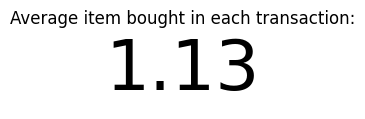

In [31]:
#find average quantity in clean sales by order id
average_item_per_order = clean_sales.groupby('order_id')['quantity'].mean().mean()

#generate visual for average item order
fig, item_order_average_visual = plt.subplots(figsize=(4, 1))
item_order_average_visual.axis('off')
item_order_average_visual.text(0.5, 0.5, "{:.2f}".format(round(average_item_per_order, 2)), fontsize=50, ha='center', va='center')
item_order_average_visual.set_title('Average item bought in each transaction:')
plt.show()

WHAT IS THE PROBABILITY?

PRODUCT ORDER % OF TOTAL SALES

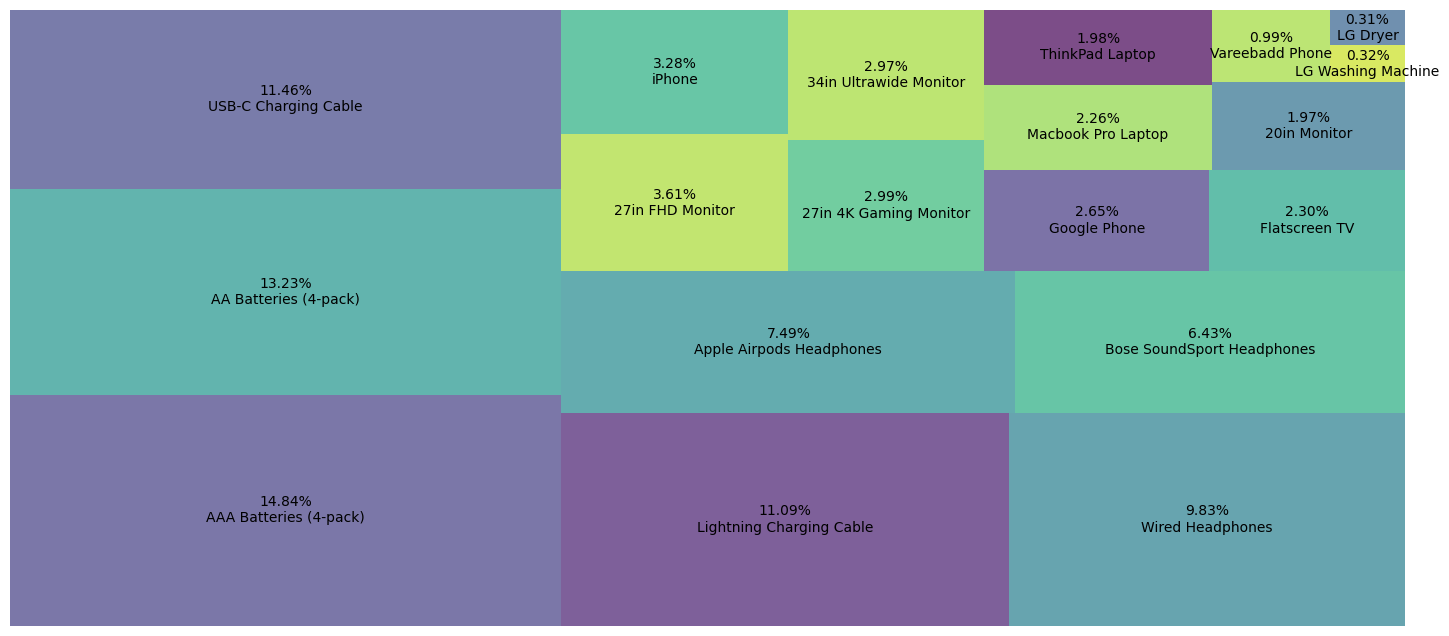

In [32]:
#find total product sales
total_product_sales = product_sales['product_sales'].sum()

#generate treemap visual for product percentage of total
#find sizes and labels value in product sales
sizes = product_sales['product_sales']
labels = product_sales['product']

#calculate percentage for each product
percentages = [f'{100*sizes[i]/sizes.sum():.2f}%\n{labels[i]}' for i in range(len(sizes))]

#plot the treemap with labels showing the product and its percentage
fig, product_treemap_visual = plt.subplots(figsize=(18, 8))
product_treemap_visual.axis('off')
squarify.plot(sizes=sizes, label=percentages, alpha=0.7)
plt.show()

SPECIFIC PROBABILITY

In [33]:
#print introduction
print(f"Probability for")

#how much probability for next people will ordered USB-C Charging Cable?
usb_c_sales = product_sales.loc[product_sales['product'] == 'USB-C Charging Cable', 'product_sales'].values[0]
usb_c_probability = usb_c_sales / total_product_sales
print(f"USB-C Charging Cable: {usb_c_probability:.2%}")

#how much probability for next people will ordered iPhone?
iphone_sales = product_sales.loc[product_sales['product'] == 'iPhone', 'product_sales'].values[0]
iphone_probability = iphone_sales / total_product_sales
print(f"iPhone: {iphone_probability:.2%}")

#how much probability for next people will ordered Google Phone?
gphone_sales = product_sales.loc[product_sales['product'] == 'Google Phone', 'product_sales'].values[0]
gphone_probability = gphone_sales / total_product_sales
print(f"Google Phone: {gphone_probability:.2%}")

#how much probability other peoples will ordered Wired Headphones?
wired_headphones_sales = product_sales.loc[product_sales['product'] == 'Wired Headphones', 'product_sales'].values[0]
wired_headphones_probability = wired_headphones_sales / total_product_sales
print(f"Wired Headphones: {wired_headphones_probability:.2%}")

Probability for
USB-C Charging Cable: 11.46%
iPhone: 3.28%
Google Phone: 2.65%
Wired Headphones: 9.83%


#Feature Engineering

In [34]:
all_sales_df.head()

,order_id,product,quantity,price,date,address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [35]:
all_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  186305 non-null  object
 1   product   186305 non-null  object
 2   quantity  186305 non-null  object
 3   price     186305 non-null  object
 4   date      186305 non-null  object
 5   address   186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [36]:
df = all_sales_df[all_sales_df['date'].str.match('\d{2}/\d{2}/\d{2} \d{2}:\d{2}')]

# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M')

# Set the datetime column as the index
df = df.set_index('date')
df.head()

<ipython-input-36-bbc77974ce8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M')


,order_id,product,quantity,price,address
date,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700,"944 Walnut St, Boston, MA 02215"
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035"
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016"
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001"
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301"


In [37]:
df = df.astype({'price':'float'})

dfprodcopy = set ( df["product"])
productdict=dict()
ind=0
for x in dfprodcopy:
    productdict[ind]=x
    ind+=1
invdict=  {v: k for k, v in productdict.items()}

def indexify(s):

    return invdict[s[1]]
df['product'] = df.apply(indexify, axis=1)

# print(productdict)
df.head()

,order_id,product,quantity,price,address
date,,,,,
2019-01-22 21:25:00,141234,9,1,700.00,"944 Walnut St, Boston, MA 02215"
2019-01-28 14:15:00,141235,15,1,14.95,"185 Maple St, Portland, OR 97035"
2019-01-17 13:33:00,141236,5,2,11.99,"538 Adams St, San Francisco, CA 94016"
2019-01-05 20:33:00,141237,8,1,149.99,"738 10th St, Los Angeles, CA 90001"
2019-01-25 11:59:00,141238,5,1,11.99,"387 10th St, Austin, TX 73301"


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

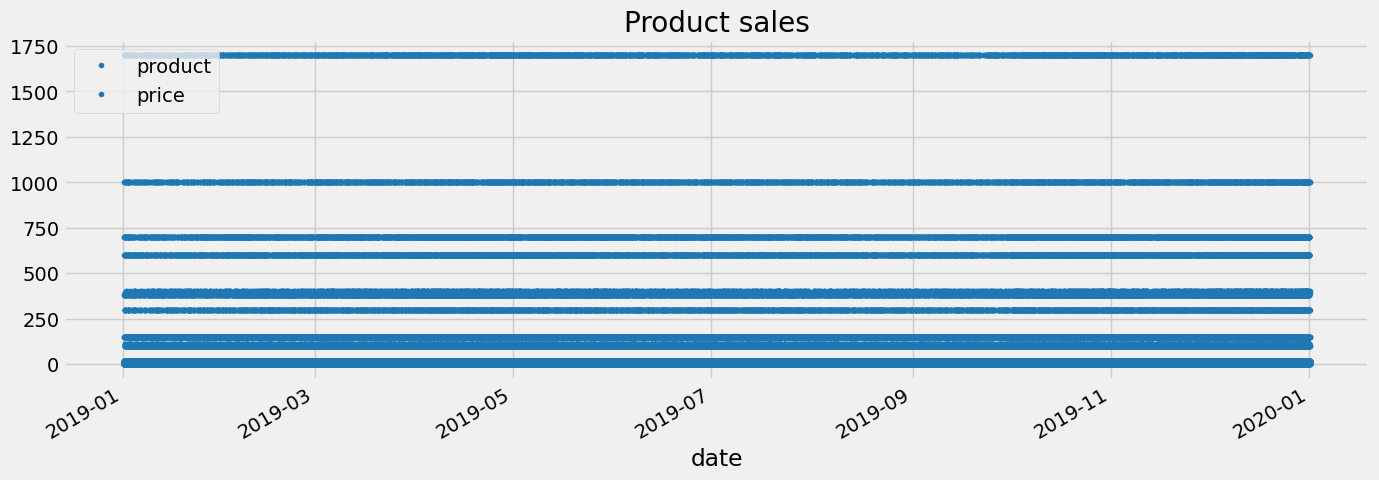

In [39]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Product sales')
plt.show()

#feature creation

In [40]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
df.head()

,order_id,product,quantity,price,address,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,,,
2019-01-22 21:25:00,141234,9,1,700.00,"944 Walnut St, Boston, MA 02215",21,1,1,1,2019,22,22,4
2019-01-28 14:15:00,141235,15,1,14.95,"185 Maple St, Portland, OR 97035",14,0,1,1,2019,28,28,5
2019-01-17 13:33:00,141236,5,2,11.99,"538 Adams St, San Francisco, CA 94016",13,3,1,1,2019,17,17,3
2019-01-05 20:33:00,141237,8,1,149.99,"738 10th St, Los Angeles, CA 90001",20,5,1,1,2019,5,5,1
2019-01-25 11:59:00,141238,5,1,11.99,"387 10th St, Austin, TX 73301",11,4,1,1,2019,25,25,4


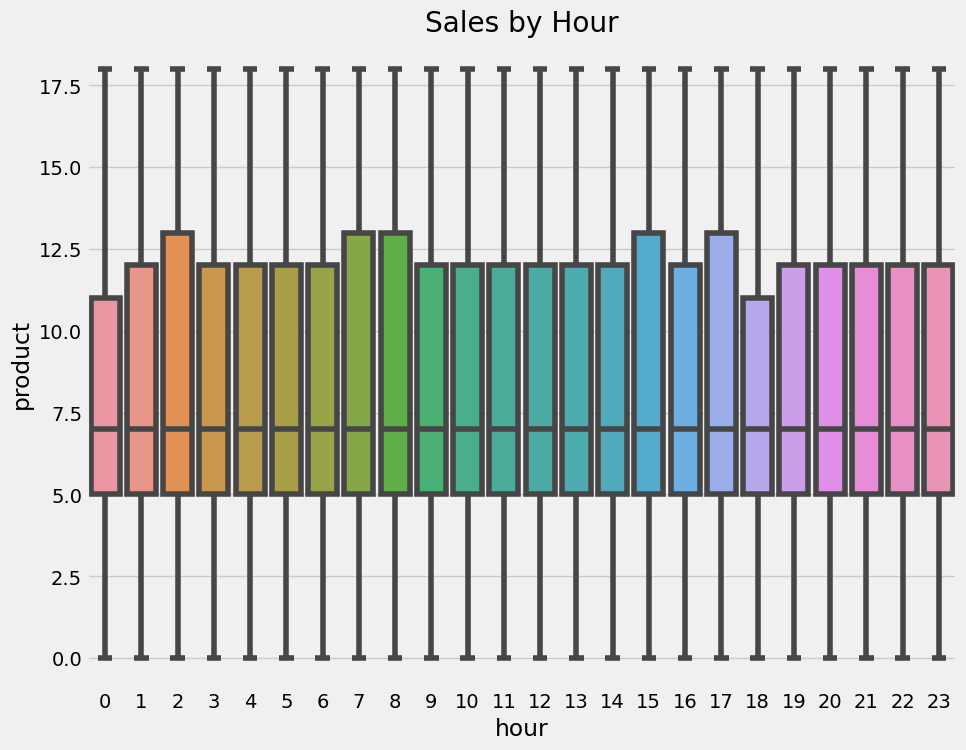

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='product')
ax.set_title('Sales by Hour')
plt.show()

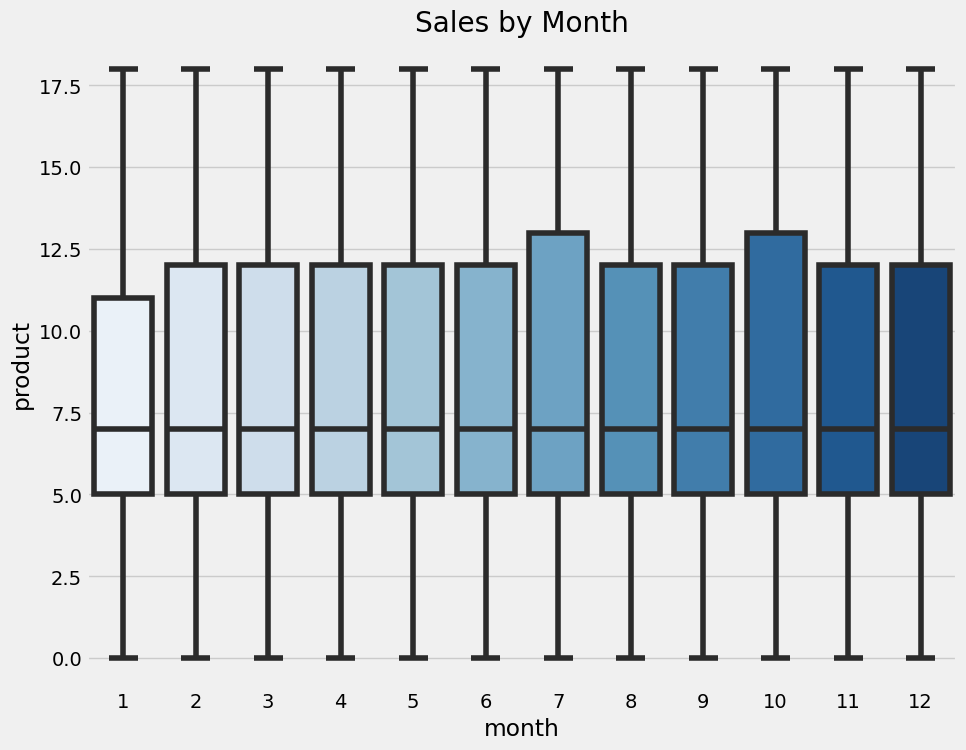

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='product', palette='Blues')
ax.set_title('Sales by Month')
plt.show()

#Train/Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train,test = train_test_split(df, random_state=42, test_size = 0.3)

In [45]:
print(len(train),len(test))

130165 55785


#model creation

In [46]:
FEATURES = ["price",'dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'product'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [47]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01,
                   )
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[16:12:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9.05884	validation_1-rmse:9.05031
[100]	validation_0-rmse:4.08779	validation_1-rmse:4.07887
[200]	validation_0-rmse:2.15421	validation_1-rmse:2.14871
[300]	validation_0-rmse:1.40094	validation_1-rmse:1.39854
[400]	validation_0-rmse:1.10180	validation_1-rmse:1.10061
[500]	validation_0-rmse:0.86561	validation_1-rmse:0.86578
[600]	validation_0-rmse:0.77208	validation_1-rmse:0.77246
[700]	validation_0-rmse:0.70307	validation_1-rmse:0.70360
[800]	validation_0-rmse:0.65990	validation_1-rmse:0.66070
[900]	validation_0-rmse:0.63800	validation_1-rmse:0.63892
[999]	validation_0-rmse:0.62561	validation_1-rmse:0.62669


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

#Feature Importance

In [48]:
reg.feature_importances_

array([9.9920475e-01, 7.9524296e-04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

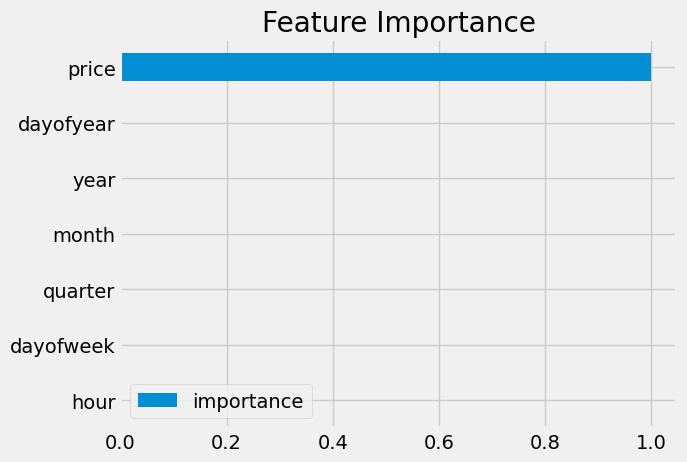

In [49]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

#Forcast on test

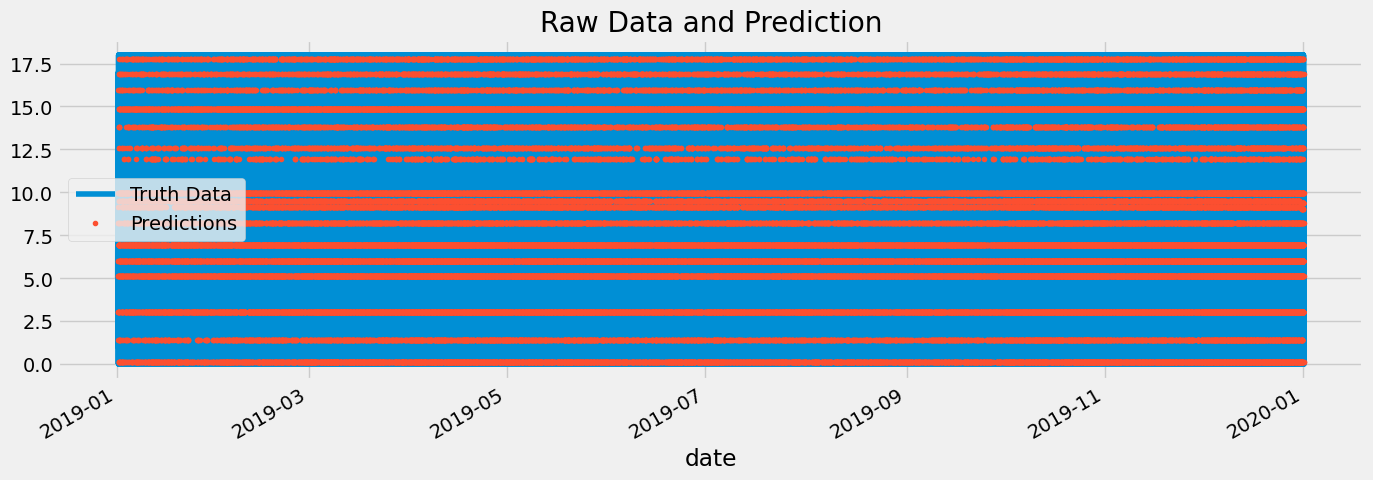

In [50]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['product']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

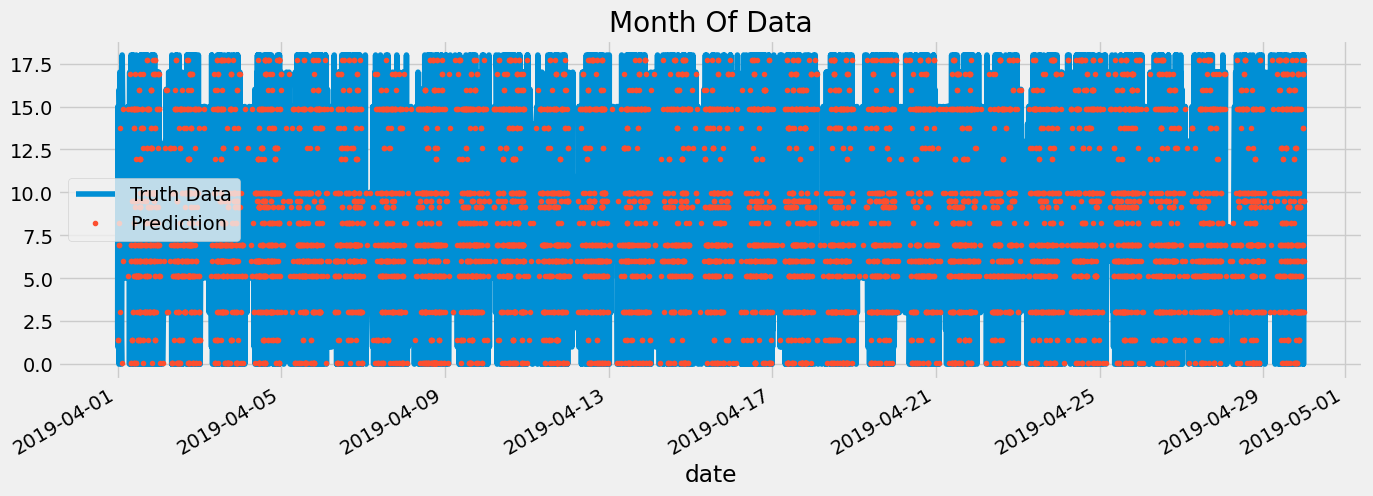

In [51]:
ax = df.loc[(df.index > '04-01-2019') & (df.index < '04-30-2019')]['product'] \
    .plot(figsize=(15, 5), title='Month Of Data')
df.loc[(df.index > '04-1-2019') & (df.index < '04-30-2019')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

#Creating Sales Features per day

In [52]:
#change data type for column quantity, price, date, and address
clean_sales['quantity'] = clean_sales['quantity'].astype(int)
clean_sales['price'] = clean_sales['price'].astype(float)
clean_sales['date'] = pd.to_datetime(clean_sales['date'], format='%m/%d/%y %H:%M')
clean_sales['address'] = clean_sales['address'].astype(str)

#add month, state, and total_sales column
clean_sales['month'] = pd.DatetimeIndex(clean_sales['date']).month
clean_sales['state'] = clean_sales['address'].str[-8:-6]
clean_sales['total_sales'] = clean_sales['quantity'] * clean_sales['price']

#find and remove partial data
#print(clean_sales(clean_sales['date].dt.year != 2019).count()) / result = 8k
clean_sales_2019 = clean_sales[clean_sales['date'].dt.year == 2019]

#print the data manipulation result
print("Data result:")
print(clean_sales_2019.info())
print("Data is not 2019:")
print(clean_sales_2019[clean_sales_2019['date'].dt.year != 2019].count())

Data result:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185652 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     185652 non-null  object        
 1   product      185652 non-null  object        
 2   quantity     185652 non-null  int64         
 3   price        185652 non-null  float64       
 4   date         185652 non-null  datetime64[ns]
 5   address      185652 non-null  object        
 6   month        185652 non-null  int64         
 7   state        185652 non-null  object        
 8   total_sales  185652 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB
None
Data is not 2019:
order_id       0
product        0
quantity       0
price          0
date           0
address        0
month          0
state          0
total_sales    0
dtype: int64


Daily sales for 2019

In [61]:
clean_sales_2019.head()

,order_id,product,quantity,price,date,address,month,state,total_sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,OR,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,CA,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,TX,11.99


In [62]:
# Group by date and calculate total sales
daily_sales = clean_sales_2019.groupby(clean_sales_2019['date'].dt.date)['total_sales'].sum().reset_index()

# Rename columns
daily_sales.columns = ['date', 'total_sales']

# Print the resulting dataframe
print(daily_sales)

           date  total_sales
0    2019-01-01     65681.94
1    2019-01-02     70663.20
2    2019-01-03     47046.20
3    2019-01-04     62000.22
4    2019-01-05     46524.63
..          ...          ...
360  2019-12-27    126604.07
361  2019-12-28    133601.53
362  2019-12-29    156009.67
363  2019-12-30    151857.82
364  2019-12-31    131439.32

[365 rows x 2 columns]


In [63]:
daily_sales.head()

,date,total_sales
0,2019-01-01,65681.94
1,2019-01-02,70663.20
2,2019-01-03,47046.20
3,2019-01-04,62000.22
4,2019-01-05,46524.63


In [64]:
daily_sales.set_index('date',inplace=True)

In [65]:
daily_sales.head()

,total_sales
date,
2019-01-01,65681.94
2019-01-02,70663.20
2019-01-03,47046.20
2019-01-04,62000.22
2019-01-05,46524.63


In [66]:
daily_sales.describe()

,total_sales
count,365.000000
mean,94402.377123
std,25716.151997
min,46524.630000
25%,74934.910000
50%,90943.910000
75%,109356.060000
max,166577.690000


#Visuallize the data

<Axes: xlabel='date'>

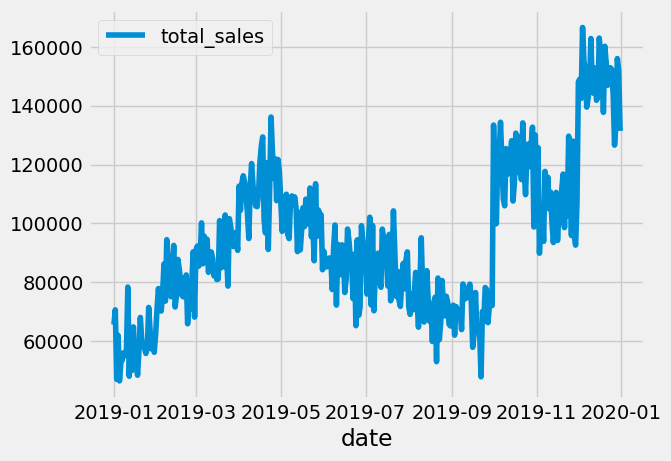

In [67]:
daily_sales.plot()

In [69]:
##testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [70]:
test_result = adfuller(daily_sales['total_sales'])

In [71]:
#HO: It is not stationary
#H1: It is stationary

def adfuller_test(sales):
  result=adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#lag used','number of observations used']
  for value, label in zip(result,labels):
    print(label+':'+str(value))
  if result[1] <=0.05:
    print("strong evidence against the null hypotheis(HO), reject the null hypothesis.Data has no root and is stationary.")
  else:
    print("weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary")

In [72]:
adfuller_test(daily_sales['total_sales'])

ADF Test Statistic:-1.616561468669262
p-value:0.47453244224142355
#lag used:4
number of observations used:360
weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


#Differencing

In [73]:
daily_sales['Sales first difference'] = daily_sales['total_sales'] - daily_sales['total_sales'].shift(1)

In [74]:
daily_sales['Seasonal first difference'] = daily_sales['total_sales'] - daily_sales['total_sales'].shift(12)

In [75]:
daily_sales.head(14)

,total_sales,Sales first difference,Seasonal first difference
date,,,
2019-01-01,65681.94,NaN,NaN
2019-01-02,70663.20,4981.26,NaN
2019-01-03,47046.20,-23617.00,NaN
2019-01-04,62000.22,14954.02,NaN
2019-01-05,46524.63,-15475.59,NaN
2019-01-06,52762.54,6237.91,NaN
2019-01-07,53676.42,913.88,NaN
2019-01-08,56100.52,2424.10,NaN
2019-01-09,55153.13,-947.39,NaN


In [76]:
#again test dickey fuller test
adfuller_test(daily_sales['Seasonal first difference'].dropna()) 

ADF Test Statistic:-3.618670119816171
p-value:0.005413964485013484
#lag used:14
number of observations used:338
strong evidence against the null hypotheis(HO), reject the null hypothesis.Data has no root and is stationary.


<Axes: xlabel='date'>

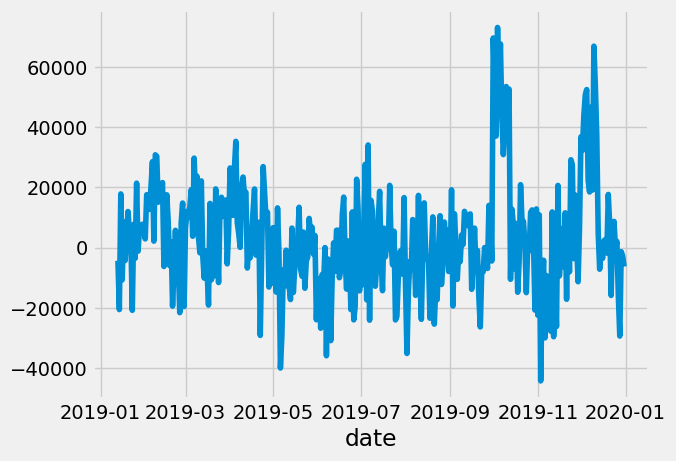

In [77]:
daily_sales['Seasonal first difference'].plot()

#Auto-Regressive Model

In [79]:
pip install pandas.tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


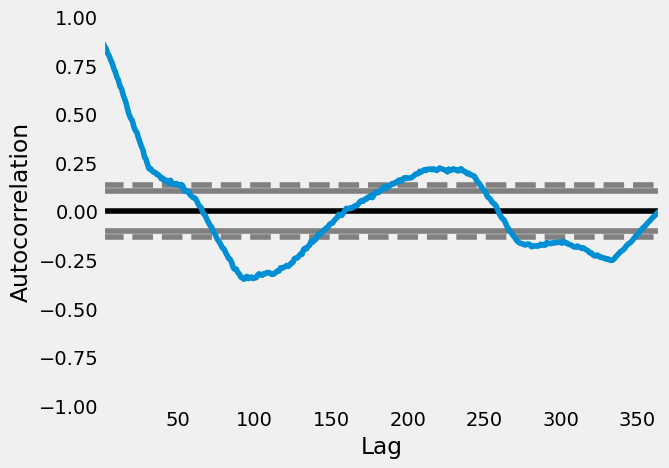

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# plot autocorrelation
pd.plotting.autocorrelation_plot(daily_sales['total_sales'])
plt.show()


In [86]:
import statsmodels.api as sm

In [83]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


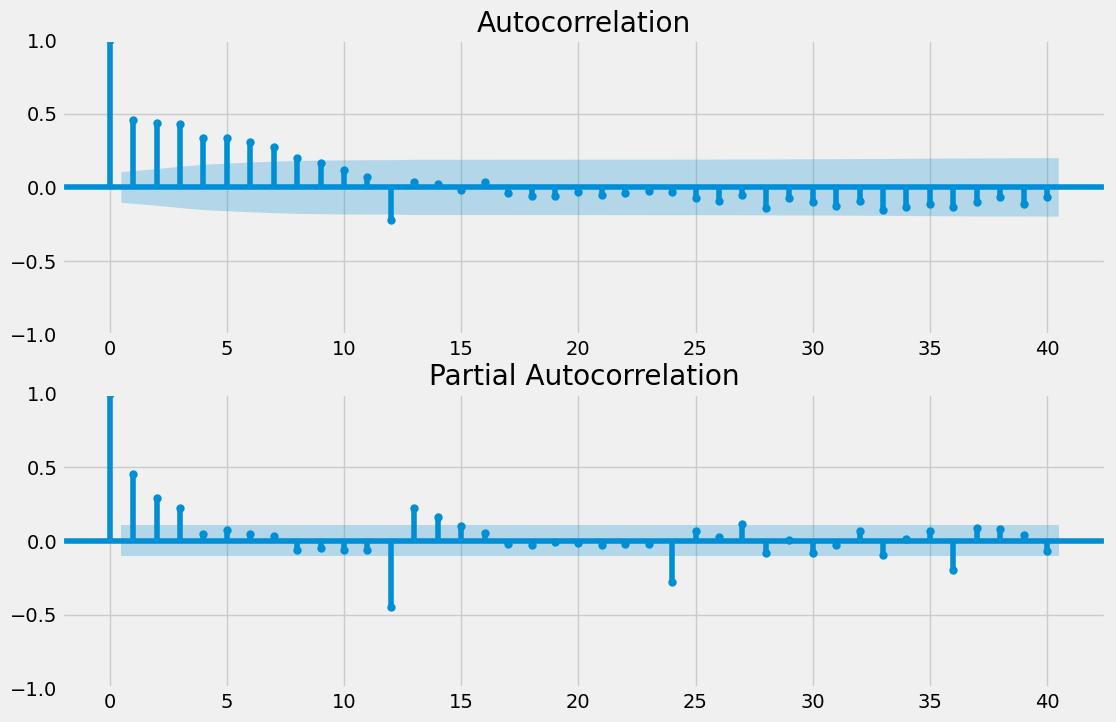

In [87]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_sales['Seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(daily_sales['Seasonal first difference'].iloc[13:],lags=40,ax=ax2)

In [91]:
#for non-seasonal data
#p= 4,d=1,q=4 
from statsmodels.tsa.arima.model import ARIMA

In [92]:
model =ARIMA(daily_sales['total_sales'],order=(4,1,4))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [93]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            total_sales   No. Observations:                  365
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -3900.823
Date:                Fri, 07 Apr 2023   AIC                           7819.646
Time:                        17:46:56   BIC                           7854.720
Sample:                    01-01-2019   HQIC                          7833.586
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2803     77.653     -0.004      0.997    -152.477     151.916
ar.L2         -0.2675     56.180     -0.005      0.996    -110.378     109.843
ar.L3         -0.4771     40.974     -0.012      0.991     -80.784      79.830
ar.L4         -0.0573      4.884     -0.012      0.991      -9.630       9.516
ma.L1         -0.3650     77.659     -0.005      0.996    -152.573     151.843
ma.L2          0.0362     46.893      0.001      0.999     -91.872      91.945
ma.L3          0.3909     44.878      0.009      0.993     -87.568      88.349
ma.L4         -0.3153     26.521     -0.012      0.991     -52.295      51.665
sigma2       1.18e+08      0.000   2.55e+11      0.000    1.18e+08    1.18e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               144.77
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+27. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

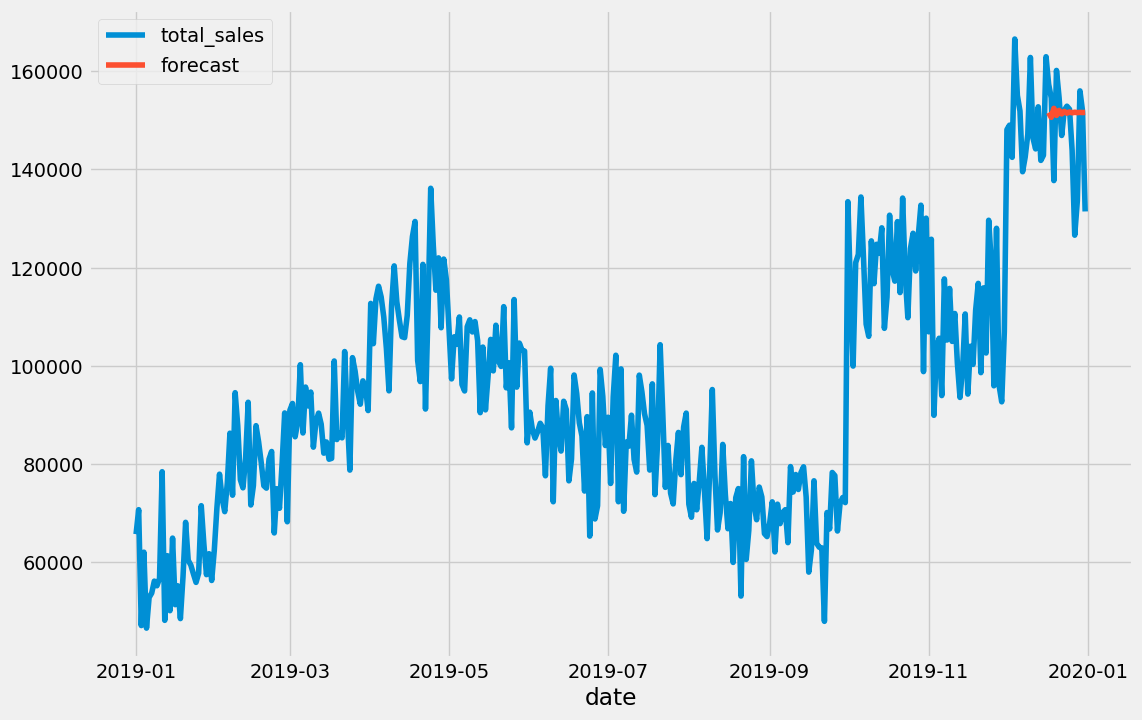

In [104]:
daily_sales['forecast'] = model_fit.predict(start=350,end=364,dynamic=True)
daily_sales[['total_sales','forecast']].plot(figsize=(12,8))  

In [96]:
model_2 = sm.tsa.statespace.SARIMAX(daily_sales['total_sales'],order=(4,1,4),seasonal_order=(4,1,4,12))
results = model_2.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

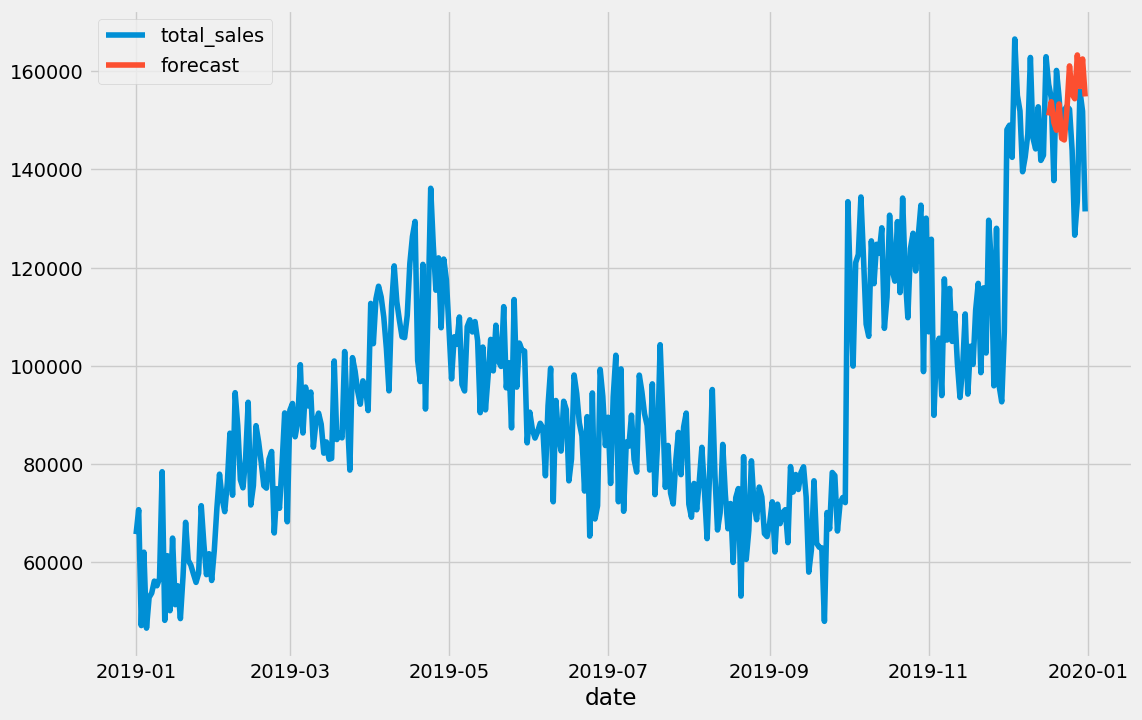

In [105]:
daily_sales['forecast'] = results.predict(start=350,end=364,dynamic=True)
daily_sales[['total_sales','forecast']].plot(figsize=(12,8))  

In [107]:
from pandas.tseries.offsets import DateOffset
future_dates = [daily_sales.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [108]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=daily_sales.columns)

In [109]:
future_datest_df.tail()

,total_sales,Sales first difference,Seasonal first difference,forecast
2021-07-31,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN
2021-09-30,NaN,NaN,NaN,NaN
2021-10-31,NaN,NaN,NaN,NaN
2021-11-30,NaN,NaN,NaN,NaN


In [110]:
future_df = pd.concat([daily_sales,future_datest_df])

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:2185: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_monotonic_increasing


<Axes: >

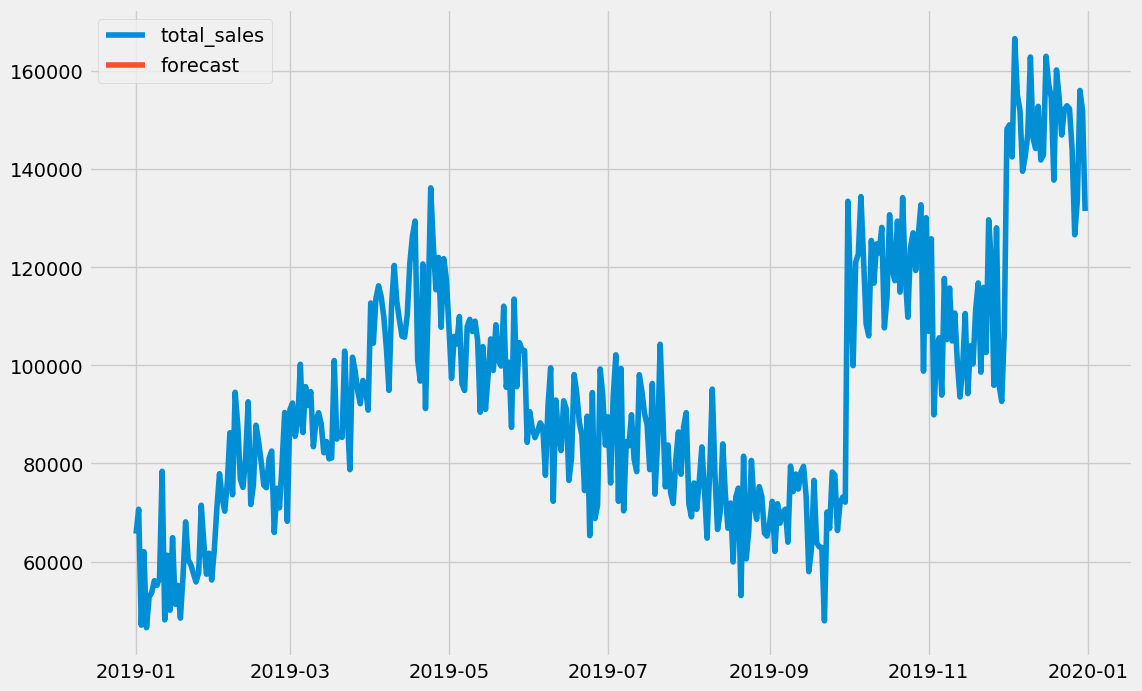

In [112]:
future_df['forecast'] = results.predict(start=365,end=380,dynamic=True)
future_df[['total_sales','forecast']].plot(figsize=(12,8))